### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1095]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1097]:
data = pd.read_csv('data/coupons.csv')

In [1098]:
orig_data=data.copy()

In [1099]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

## Check for duplicates
74 records are dropped as duplicates

In [1102]:
print("Before removing duplicates:", data.shape)

Before removing duplicates: (12684, 26)


In [1103]:
#remove duplicates
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

After removing duplicates: (12610, 26)


## Check Missing Values

In [1105]:
#Check for missing values
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      129
CarryAway                 150
Restaurant20To50          189
CoffeeHouse               217
car                     12502
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

Text(0.5, 1.0, 'car column has more than 90% missing values')

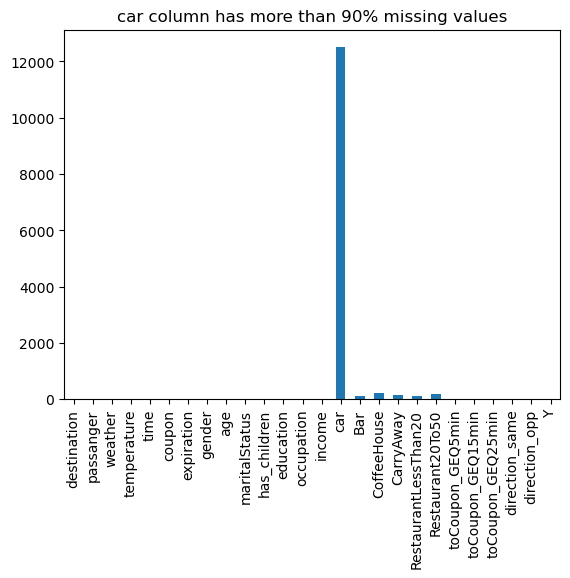

In [1107]:
data.isna().sum().plot(kind ='bar')
plt.title('car column has more than 90% missing values')

## Handle missing values

Drop car column

Replace missing values in categorical column "Bar" with mode value

Replace missing values in categorical column "CoffeeHouse" with mode value


In [1109]:
#Drop car column

df = data.drop(columns=['car']) 

In [1110]:
#Replace categorical column "Bar" with mode value ('never')

df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)

C:\Users\shikh\AppData\Local\Temp\ipykernel_24708\2087061204.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)


In [1111]:
df['Bar'].value_counts()

Bar
never    5285
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [1112]:
#Replace missing values in categorical column "CoffeeHouse" with mode value ('less1')

df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)

C:\Users\shikh\AppData\Local\Temp\ipykernel_24708\2411529861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)


In [1113]:
df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3579
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64

## Data handling
Rename column name "Passanger" to "Passenger"

Replace '(' and ')' to blanks in column Passenger

Handle strings in age column

In [1115]:
df.info()

# age has object datatype
# passanger column has typo in name

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [1116]:
#Rename column name "Passanger" to "Passenger"

df= df.rename(columns={'passanger': 'passenger'})

In [1117]:
#Replace '(' and ')' to blanks in column Passenger

df['passenger'] = df['passenger'].str.replace("(","").str.replace(")","")

In [1118]:
# Handle strings in age column

df['age'] = df['age'].replace(['50plus', 'below21'], ['50', '20'])

df['age'] = df['age'].astype(int)

In [1119]:
df.shape[0]

12610

4. What proportion of the total observations chose to accept the coupon?



In [1121]:
Total_accepted_proportion = df['Y'].mean()
print("Proportion of the total observations chose to accept the coupon is:", f"{Total_accepted_proportion:.2f}") 

Proportion of the total observations chose to accept the coupon is: 0.57


5. Use a bar plot to visualize the `coupon` column.

In [1123]:
df['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [1124]:
df.groupby('coupon')[['Y']].mean().round(2)

,Y
coupon,
Bar,0.41
Carry out & Take away,0.73
Coffee House,0.50
Restaurant(20-50),0.44
Restaurant(<20),0.71


Text(0.5, 1.0, '"Carry Out and Take away" coupons are accepted the most')

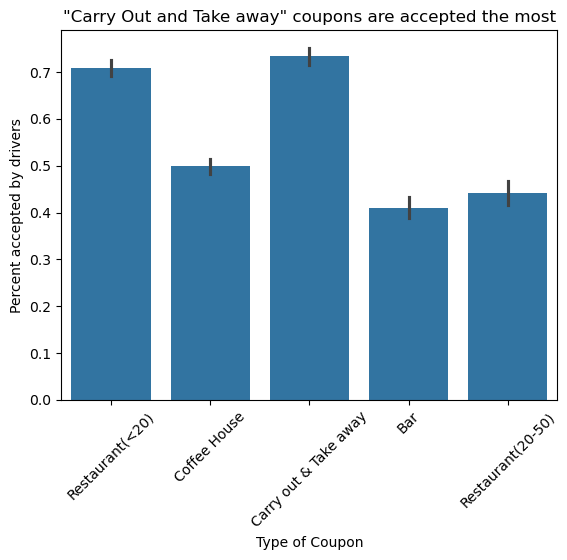

In [1125]:
sns.barplot(data = df, x = 'coupon',y='Y')
plt.xticks(rotation=45)
plt.xlabel('Type of Coupon')
plt.ylabel('Percent accepted by drivers')
plt.title('"Carry Out and Take away" coupons are accepted the most') 

6. Use a histogram to visualize the temperature column.

In [1127]:
df['temperature'].value_counts()

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

Text(0.5, 1.0, 'Most coupons are accepted when temperature is sunny')

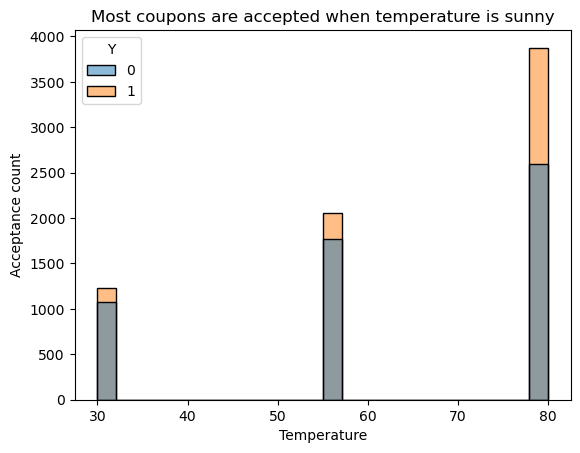

In [1128]:
sns.histplot(data=df, x='temperature', hue='Y')
plt.xlabel('Temperature')
plt.ylabel('Acceptance count')
plt.title('Most coupons are accepted when temperature is sunny')

## Investigating categorical columns

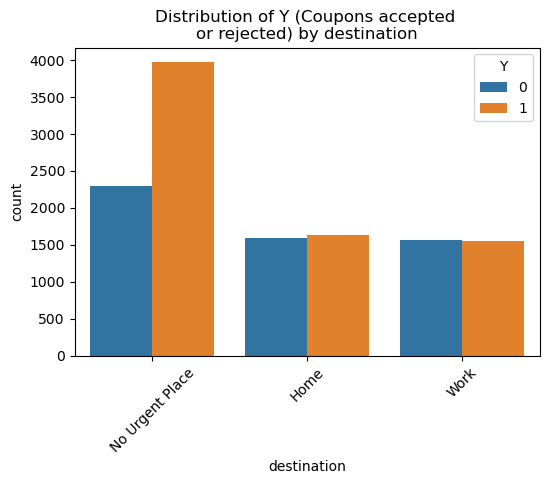

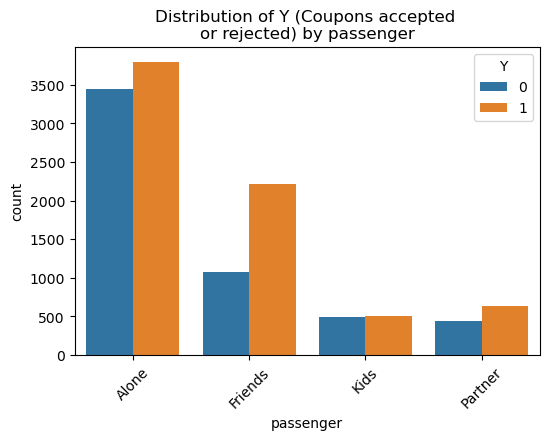

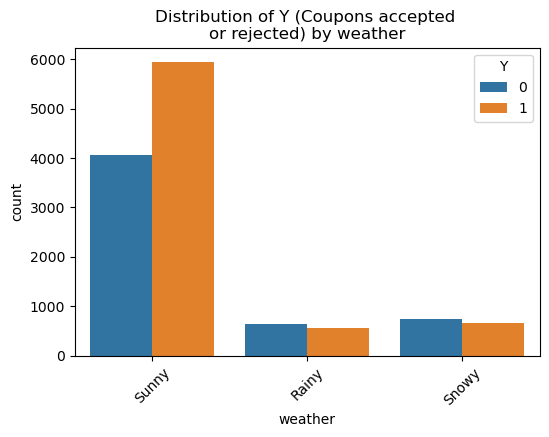

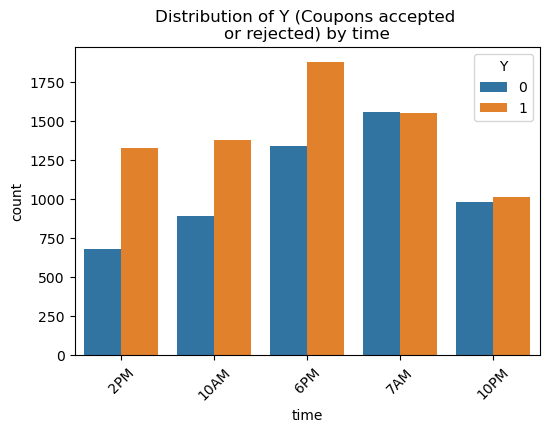

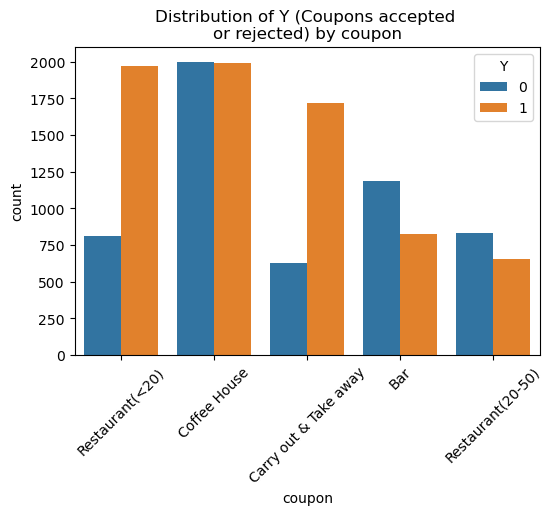

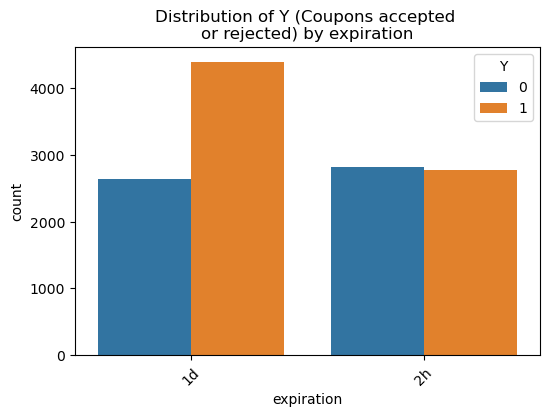

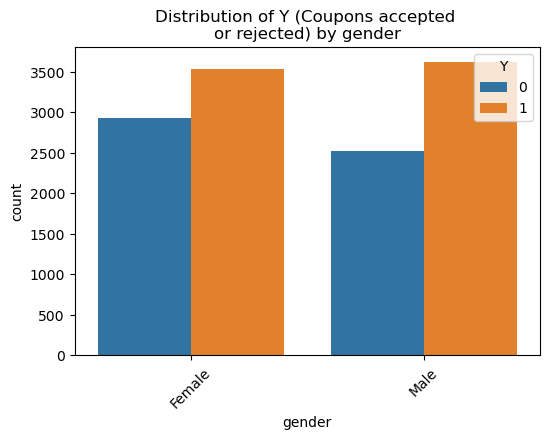

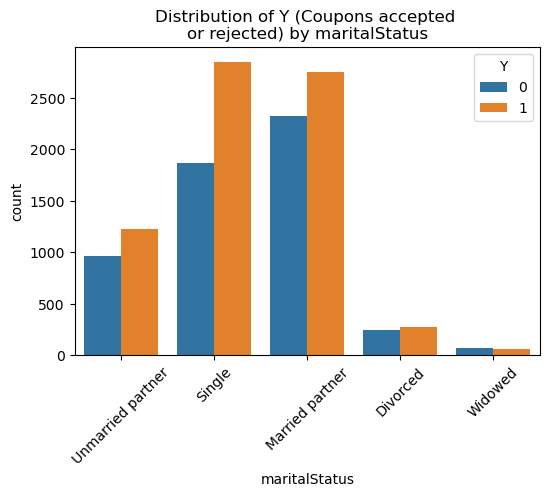

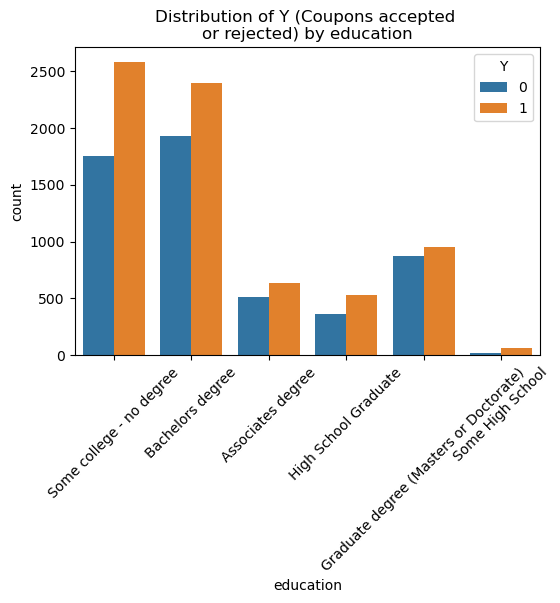

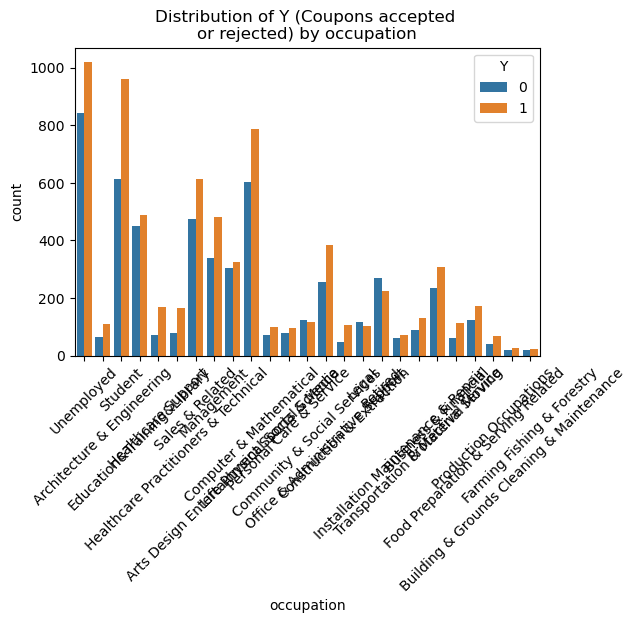

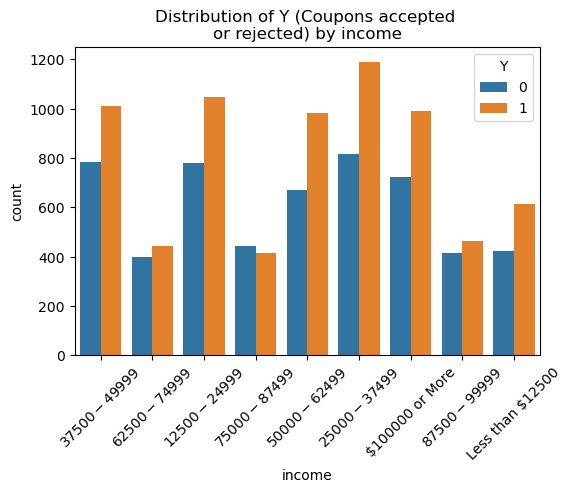

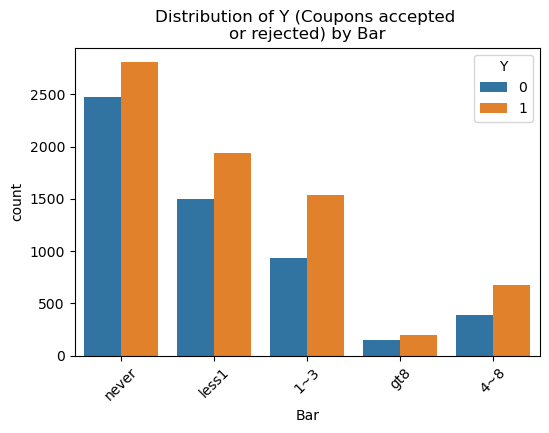

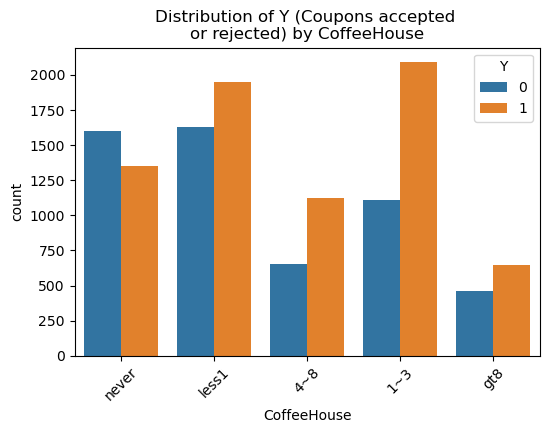

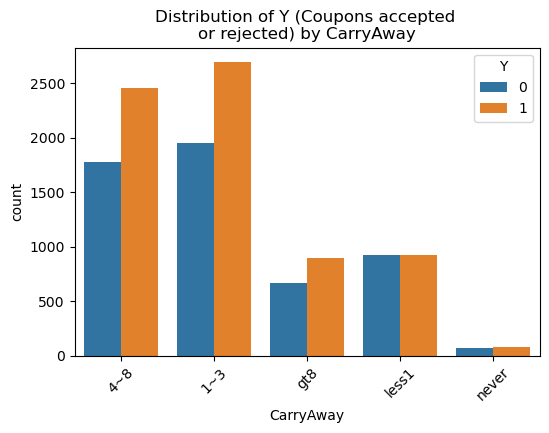

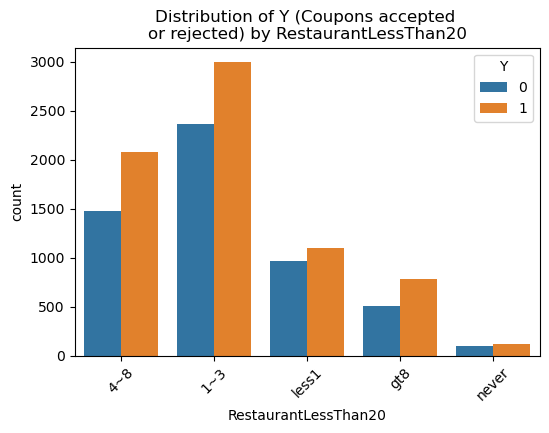

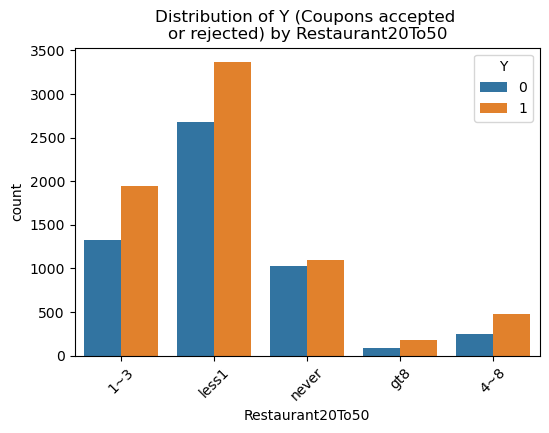

In [1130]:
#for loop used to investigate all the columns with data types other than int

categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Y':  # Assuming 'credit_class' is also a categorical column
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Y', data=df)
        plt.title(f'Distribution of Y (Coupons accepted \nor rejected) by {col}')
        plt.xticks(rotation=45)
        #plt.tight_layout()
        plt.show()

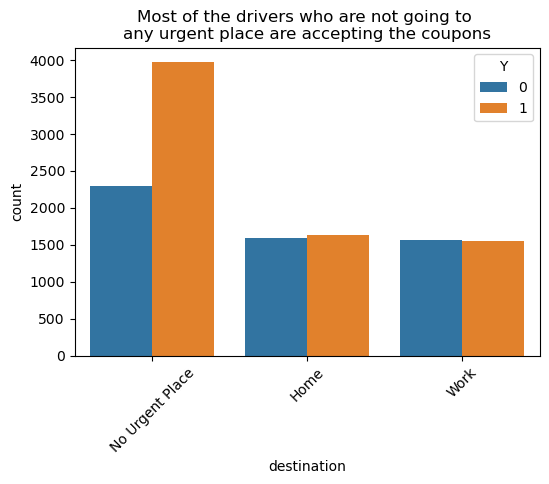

In [1131]:
# To look into destination column

plt.figure(figsize=(6, 4))
sns.countplot(x='destination', hue='Y', data=df)
plt.title('Most of the drivers who are not going to \nany urgent place are accepting the coupons')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

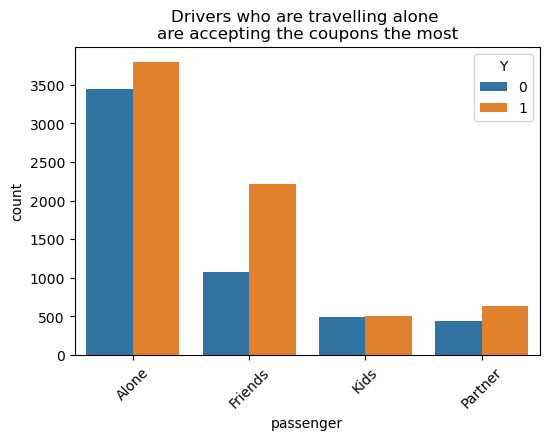

In [1132]:
# To look into passenger column

plt.figure(figsize=(6, 4))
sns.countplot(x='passenger', hue='Y', data=df)
plt.title('Drivers who are travelling alone \nare accepting the coupons the most')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

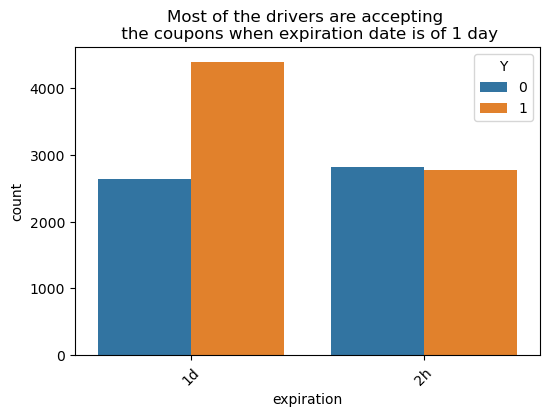

In [1133]:
# To look into expiration column

plt.figure(figsize=(6, 4))
sns.countplot(x='expiration', hue='Y', data=df)
plt.title('Most of the drivers are accepting \n the coupons when expiration date is of 1 day')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

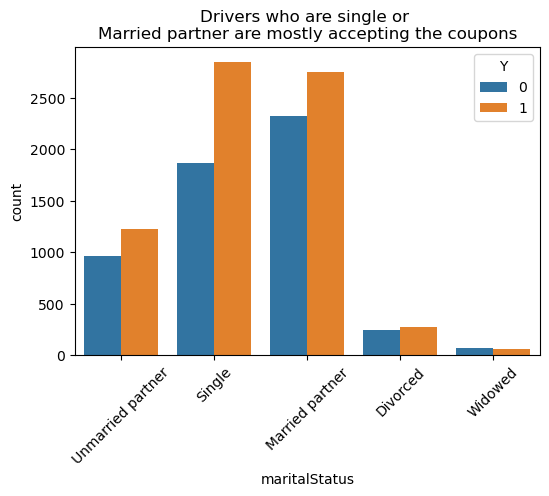

In [1134]:
# To look into maritalStatus column

plt.figure(figsize=(6, 4))
sns.countplot(x='maritalStatus', hue='Y', data=df)
plt.title('Drivers who are single or \nMarried partner are mostly accepting the coupons')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

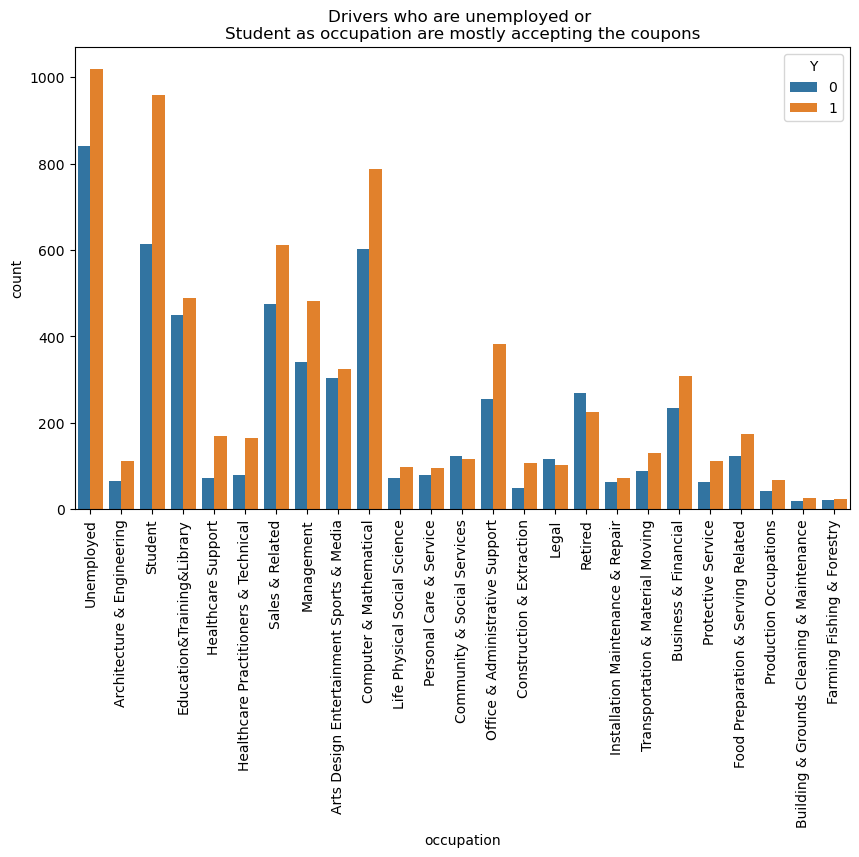

In [1135]:
#To look into occupation column

plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='Y', data=df)
plt.title('Drivers who are unemployed or \nStudent as occupation are mostly accepting the coupons')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

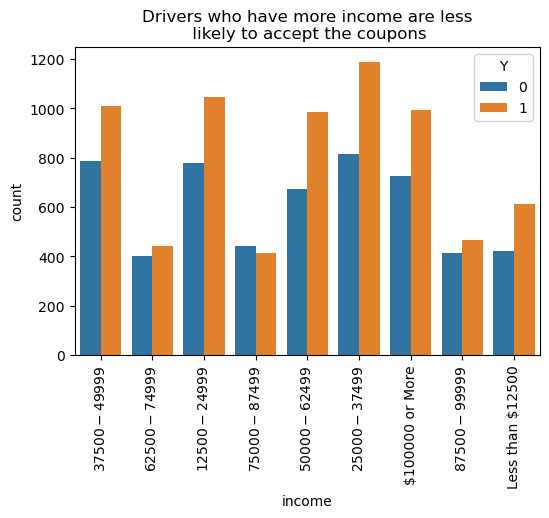

In [1136]:
#To look into income column

plt.figure(figsize=(6, 4))
sns.countplot(x='income', hue='Y', data=df)
plt.title('Drivers who have more income are less\n likely to accept the coupons')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

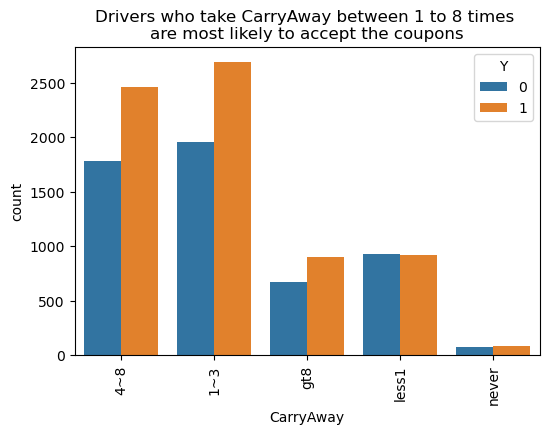

In [1137]:
# To look into CarryAway column

plt.figure(figsize=(6, 4))
sns.countplot(x='CarryAway', hue='Y', data=df)
plt.title('Drivers who take CarryAway between 1 to 8 times \nare most likely to accept the coupons')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

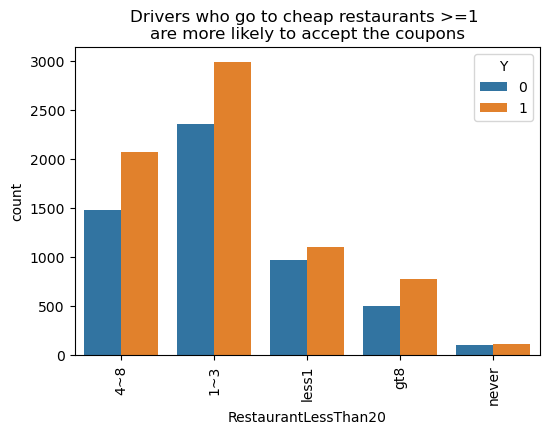

In [1138]:
# To look into RestaurantLessThan20 column 

plt.figure(figsize=(6, 4))
sns.countplot(x='RestaurantLessThan20', hue='Y', data=df)
plt.title('Drivers who go to cheap restaurants >=1 \nare more likely to accept the coupons')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

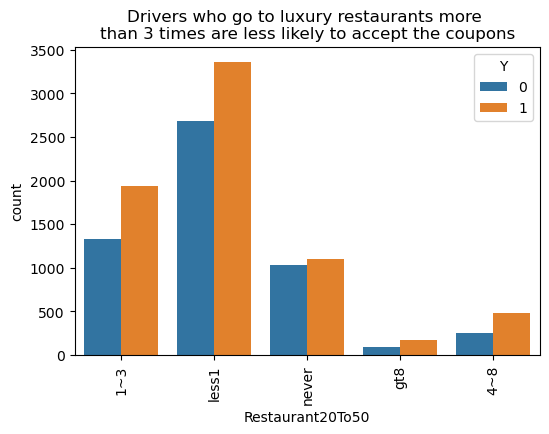

In [1139]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Restaurant20To50', hue='Y', data=df)
plt.title('Drivers who go to luxury restaurants more \nthan 3 times are less likely to accept the coupons')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1141]:
bar_df = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [1143]:
Bar_Coupons_Accepted = bar_df['Y'].mean().round(2)
print("Proportion of bar coupons were accepted:", f"{Bar_Coupons_Accepted:.2f}") 

Proportion of bar coupons were accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [1145]:
bar_df['Bar'].value_counts()

Bar
never    851
less1    563
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [1146]:
bar_df[(bar_df['Bar'] == 'never') & (bar_df['Y'] == 1)].shape[0]

164

In [1147]:
bar_3_or_few_times= ["less1","1~3"]

df1_acceptance_rate = bar_df.query('Bar in @bar_3_or_few_times')['Y'].mean().round(2)
df1_acceptance_rate
#510,457

0.53

In [1148]:
bar_more_than_3_times= ["4~8","gt8"]
df2_acceptance_rate = bar_df.query('Bar in @bar_more_than_3_times')['Y'].mean().round(2)
df2_acceptance_rate
# 1= 153, 0=46

0.77

Text(0.5, 1.0, 'Driver who go to bar more than 3 times are more likely to accept the coupon')

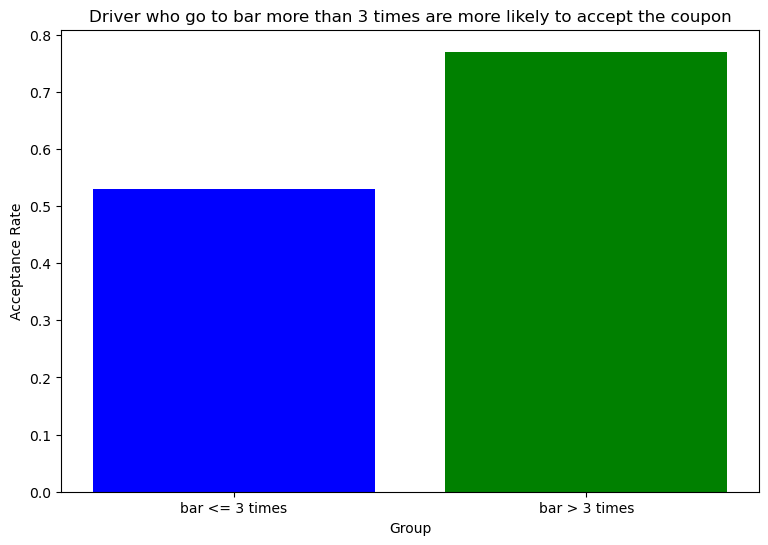

In [1149]:
# Data for plotting
groups = ['bar <= 3 times', 'bar > 3 times']
acceptance_rates = [df1_acceptance_rate, df2_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who go to bar more than 3 times are more likely to accept the coupon')

In [1150]:
# Observation: Drivers who go to bar 3 or more times in a month has more likely accepted the coupon than driver who went less than 3 times.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [1152]:
bar_more_than_once= ["1~3","4~8","gt8"]

In [1153]:
df3 = bar_df[(bar_df['Bar'].isin(bar_more_than_once) & (bar_df['age'] > (25)))]

df3_acceptance_rate = df3['Y'].mean().round(2)
df3_acceptance_rate

0.7

In [1154]:
df4 = bar_df[~((bar_df['Bar'].isin(bar_more_than_once) & (bar_df['age'] > (25))))]

df4_acceptance_rate = df4['Y'].mean().round(2)
df4_acceptance_rate

0.33

In [1155]:
# Plot to visualize the acceptance rate

Text(0.5, 1.0, 'Drivers who go to bar > 1 and has age > 25 are more likely to accept the coupon')

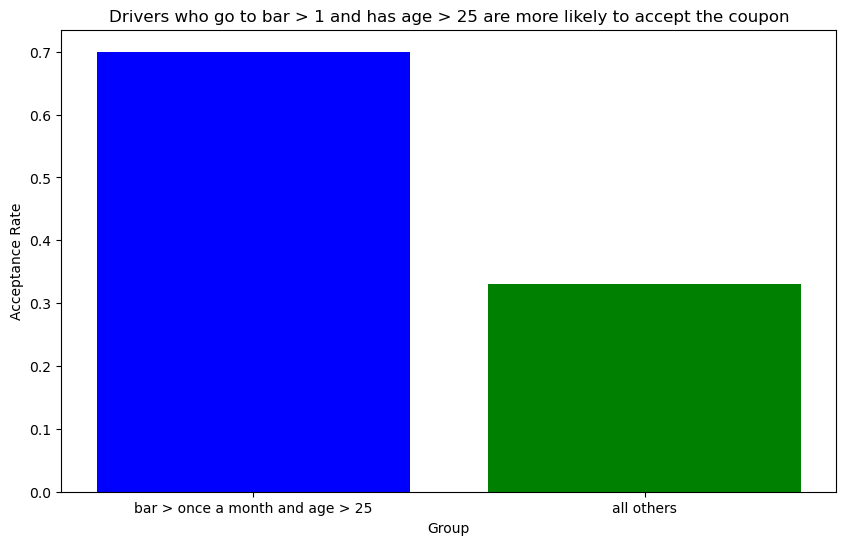

In [1156]:
# Data for plotting
groups = ['bar > once a month and age > 25', 'all others']
acceptance_rates = [df3_acceptance_rate, df4_acceptance_rate]

plt.figure(figsize=(10, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Drivers who go to bar > 1 and has age > 25 are more likely to accept the coupon')

In [1157]:
#Observation: Driver who go to bar more than once a month and has age greater than 25 are more likely to accept coupons than all others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [1159]:
df5 = bar_df[(bar_df['Bar'].isin(bar_more_than_once) & 
                (bar_df['passenger'] != 'Kids') & 
                (bar_df['occupation'] != 'Farming Fishing & Forestry'))]

df5_acceptance_rate = df5['Y'].mean().round(2)
df5_acceptance_rate

0.71

In [1160]:
df6 = bar_df[~(bar_df['Bar'].isin(bar_more_than_once) & 
                (bar_df['passenger'] != 'Kids') & 
                (bar_df['occupation'] != 'Farming Fishing & Forestry'))]

df6_acceptance_rate = df6['Y'].mean().round(2)
df6_acceptance_rate

0.3

Text(0.5, 1.0, 'Drivers who go to bar more than once and, has no kids as passengers and, \n does not work in "Farming Fishing & Forestry" are more likely to accept the coupons')

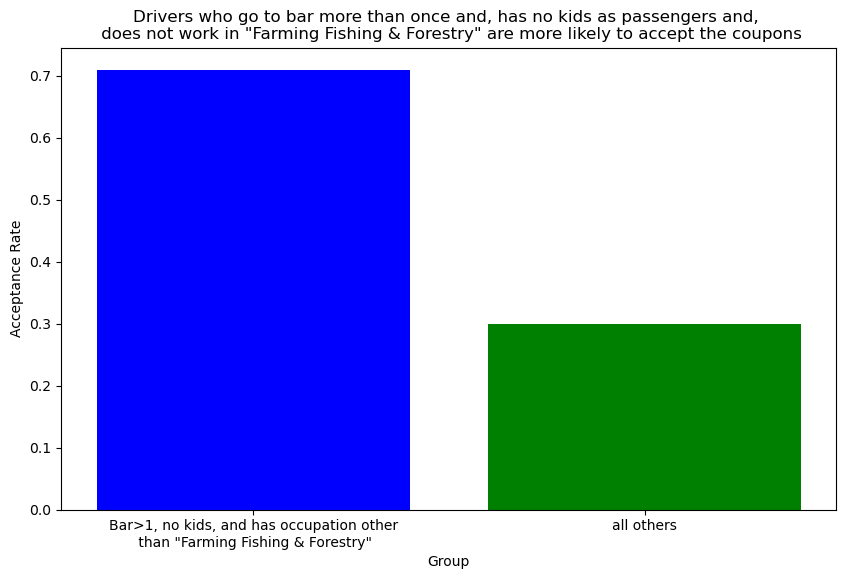

In [1161]:
# Data for plotting
groups = ['Bar>1, no kids, and has occupation other\n than "Farming Fishing & Forestry"', 'all others']
acceptance_rates = [df5_acceptance_rate, df6_acceptance_rate]

plt.figure(figsize=(10, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Drivers who go to bar more than once and, has no kids as passengers and, \n does not work in "Farming Fishing & Forestry" are more likely to accept the coupons') 

#Observation: Driver who go to bar more than once a month and has no kids and has occupation other than 'Farming Fishing & Forestry' 
#are more likely to accept coupons than all others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [1164]:
df7 = bar_df[(bar_df['Bar'].isin(bar_more_than_once) & 
                (bar_df['passenger'] != 'Kids') & 
                (bar_df['maritalStatus'] != 'Widowed'))]

df7_acceptance_rate = df7['Y'].mean().round(2)
df7_acceptance_rate

0.71

In [1165]:
df8 = bar_df[(bar_df['Bar'].isin(bar_more_than_once) & 
                (bar_df['age'] < 30))]

df8_acceptance_rate = df8['Y'].mean().round(2)
df8_acceptance_rate

0.72

In [1166]:
bar_df['income'].value_counts()

income
$25000 - $37499     318
$12500 - $24999     288
$100000 or More     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     141
$62500 - $74999     130
Name: count, dtype: int64

In [1167]:
restaurant_more_than_four = ["4~8","gt8"]
income_less_than_50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

df9 = bar_df[(bar_df['RestaurantLessThan20'].isin(restaurant_more_than_four) & 
                bar_df['income'].isin(income_less_than_50k))]

df9_acceptance_rate = df9['Y'].mean().round(2)
df9_acceptance_rate

0.45

Text(0.5, 1.0, 'Drivers who visits cheap restaurants more than 4 times a month and \n income is less than 50K are less likely to accept coupon')

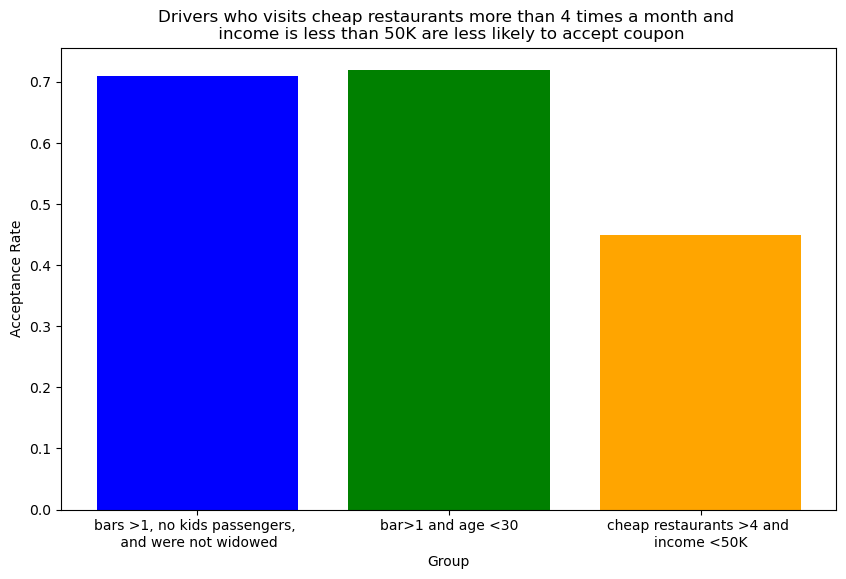

In [1168]:
# Data for plotting
groups = ['bars >1, no kids passengers, \n and were not widowed', 'bar>1 and age <30', 'cheap restaurants >4 and \nincome <50K']
acceptance_rates = [df7_acceptance_rate, df8_acceptance_rate, df9_acceptance_rate]

plt.figure(figsize=(10, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green', 'orange'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Drivers who visits cheap restaurants more than 4 times a month and \n income is less than 50K are less likely to accept coupon') 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [1313]:
# Driver who go to bar more than once a month and has age greater than 25 and has no kids and 
# has income less than 50k are more likely to accept coupons than all others.

In [1315]:
# Driver who go to bar less and has age less than 25 and has kids and who has income more than 50k are less likely to accept coupons.

## To investigate categorical columns on Bar coupon data

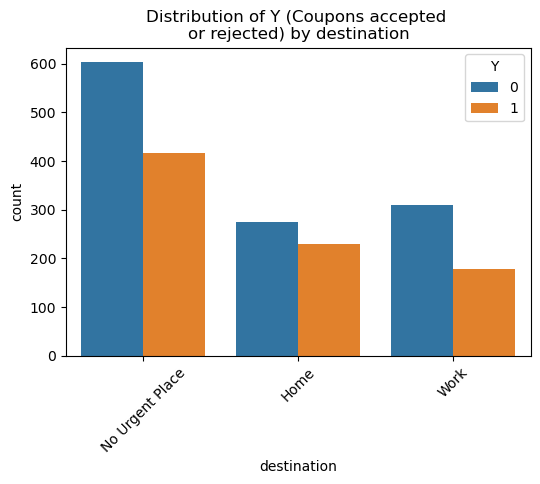

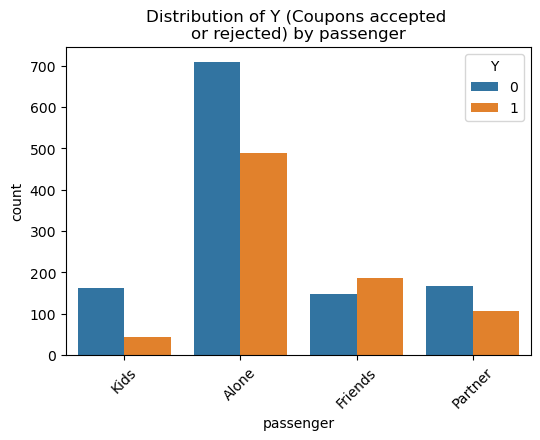

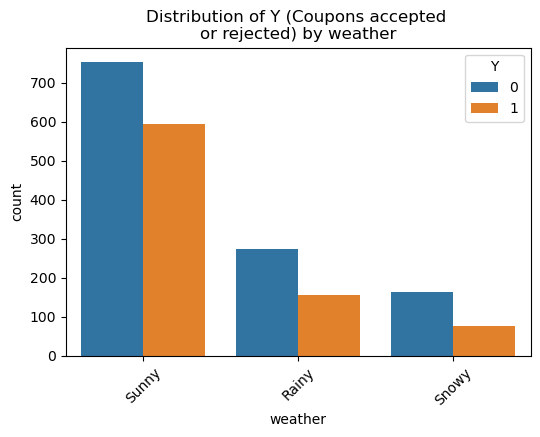

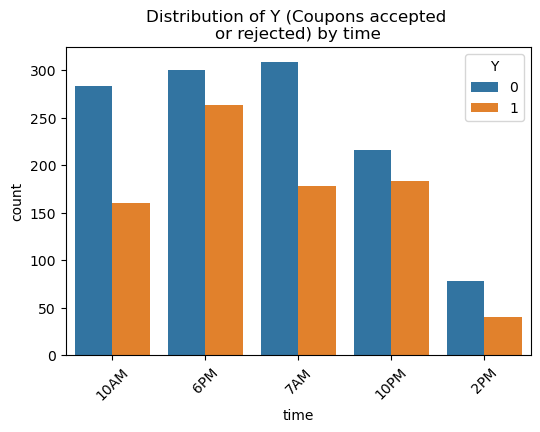

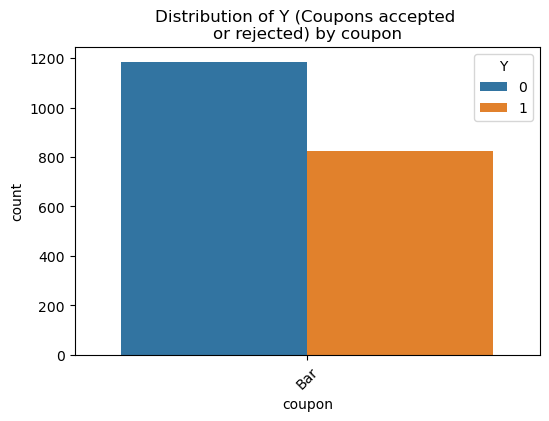

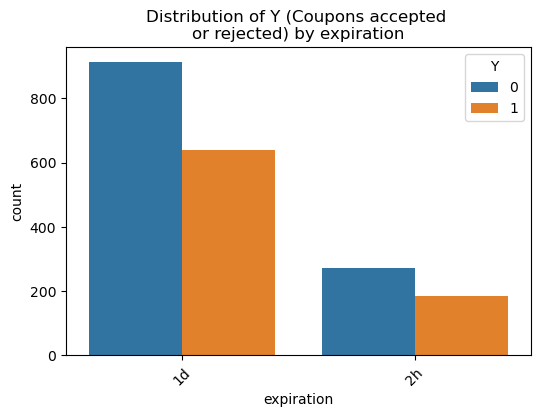

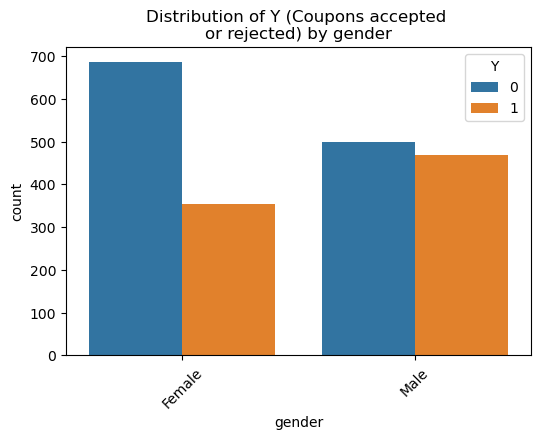

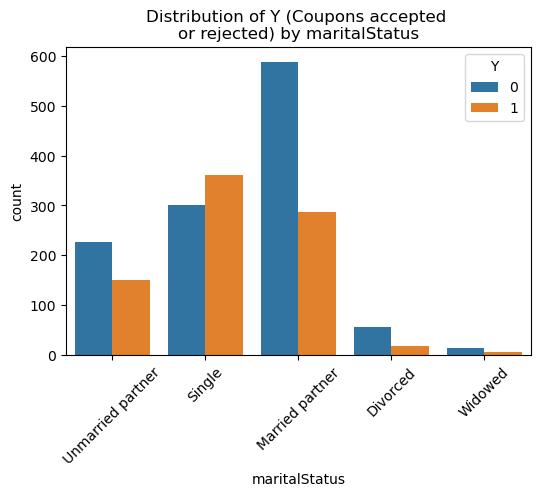

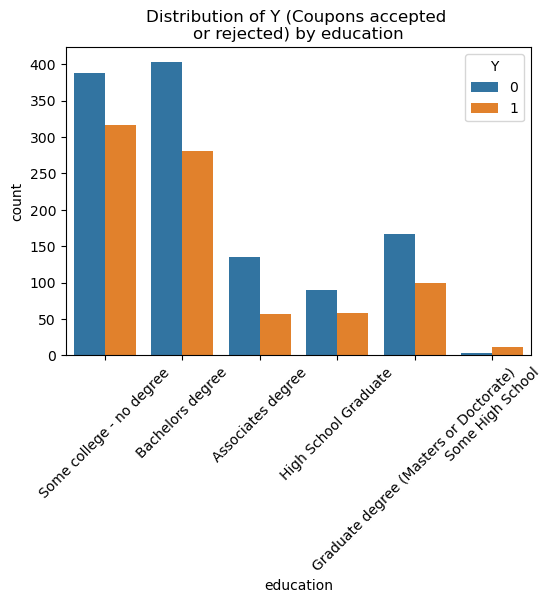

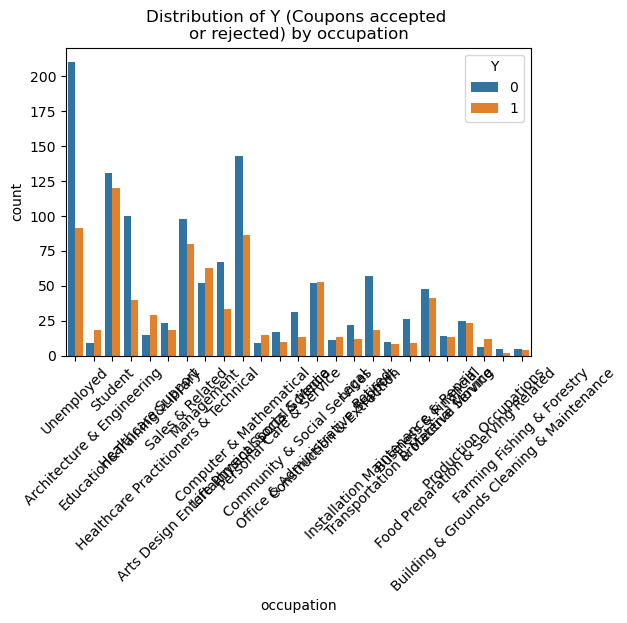

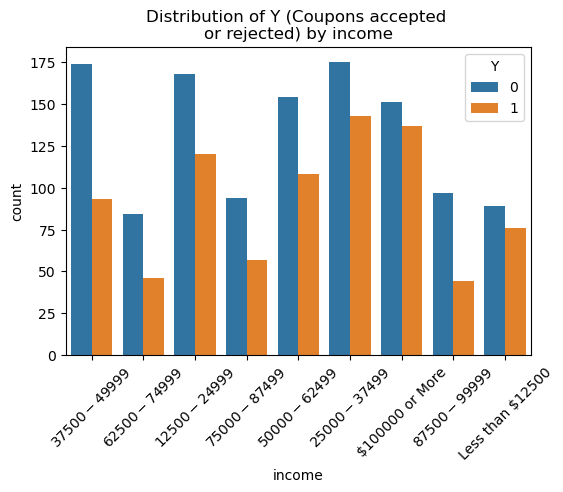

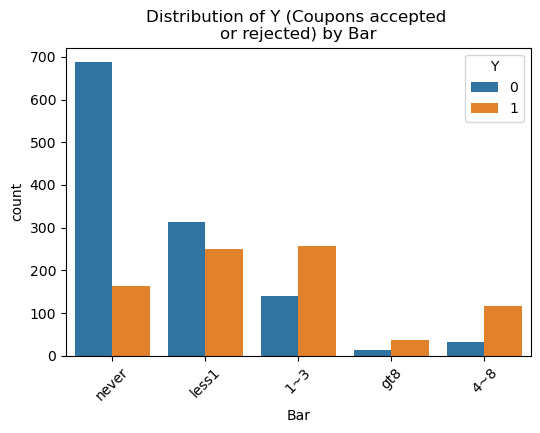

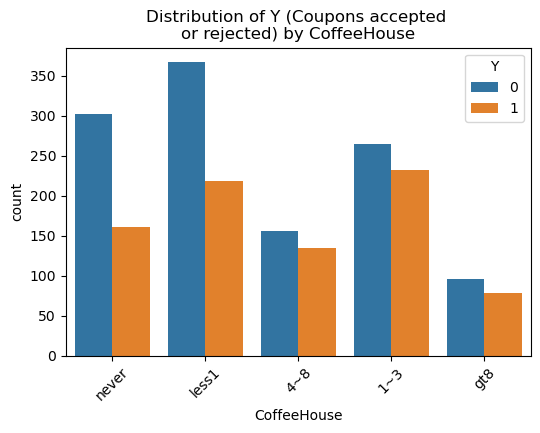

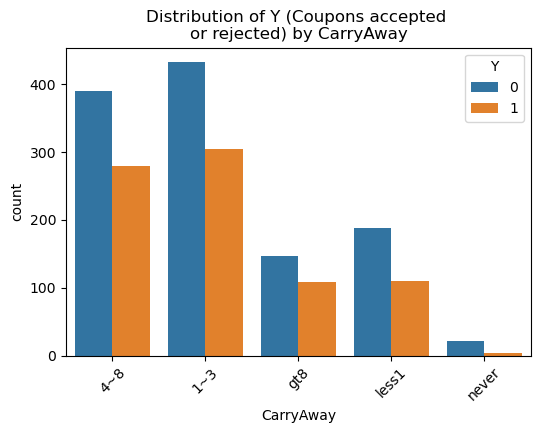

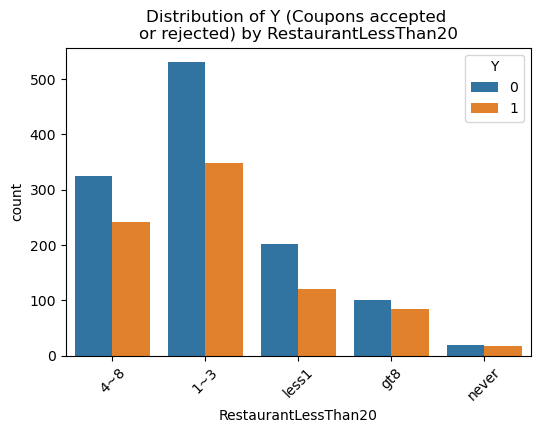

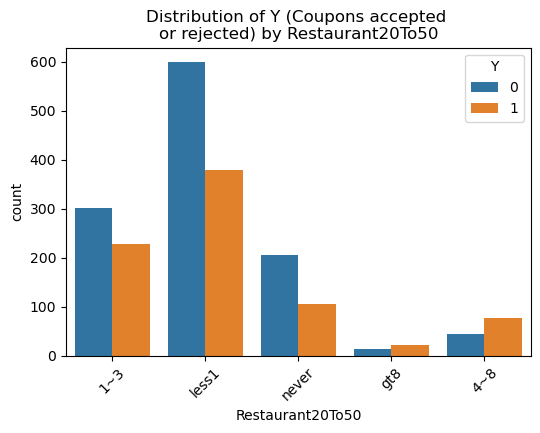

In [1173]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Y':  # Assuming 'credit_class' is also a categorical column
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Y', data=bar_df)
        plt.title(f'Distribution of Y (Coupons accepted \nor rejected) by {col}')
        plt.xticks(rotation=45)
        #plt.tight_layout()
        plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. A new DataFrame that contains just the coffeehouse coupons.

In [1176]:
coffee_df = df[df['coupon'] == 'Coffee House']


2. What proportion of coffeehouse coupons were accepted?

In [1178]:
coupons_accepted = coffee_df['Y'].mean().round(2)
print("Proportion of coffeehouse coupons were accepted:", f"{coupons_accepted:.2f}")

Proportion of coffeehouse coupons were accepted: 0.50


3. Compare the acceptance rate between those who went to a coffeehouse 3 or fewer times a month to those who went more.

In [1180]:
coffee_df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1144
1~3      1038
never     927
4~8       538
gt8       342
Name: count, dtype: int64

In [1181]:
coffee_less_than_3_times = ["less1","1~3"]
df10_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_less_than_3_times)]['Y'].mean().round(2)
df10_acceptance_rate

0.56

In [1182]:
coffee_more_than_3_times = ["4~8","gt8"]
df11_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_more_than_3_times)]['Y'].mean().round(2)
df11_acceptance_rate

0.68

Text(0.5, 1.0, 'Driver who go to coffeehouse more than 3 times are\n more likely to accept the coupon')

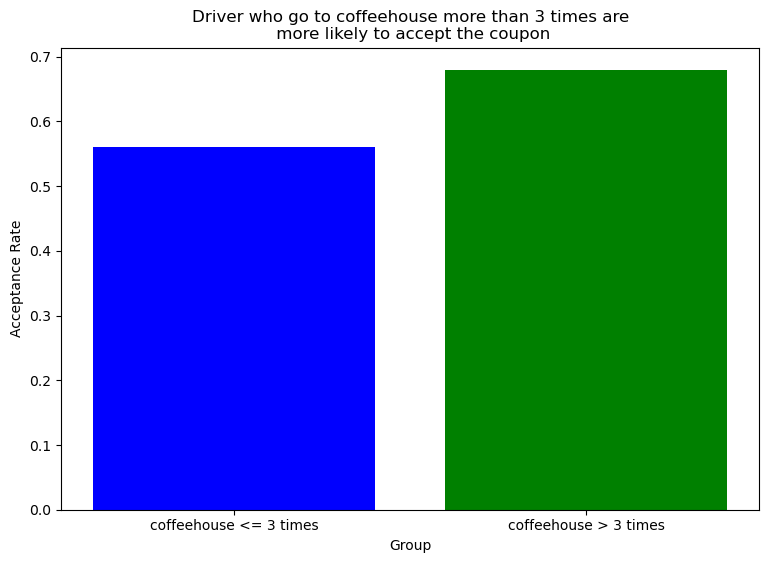

In [1183]:
# Data for plotting
groups = ['coffeehouse <= 3 times', 'coffeehouse > 3 times']
acceptance_rates = [df10_acceptance_rate, df11_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who go to coffeehouse more than 3 times are\n more likely to accept the coupon')

4. Compare acceptance rate between male and female drivers who visits coffeehouse at least once in a month and has partner as passenger

In [1185]:
coffee_df['gender'].value_counts()

gender
Female    2048
Male      1941
Name: count, dtype: int64

In [1186]:
coffee_atleast_once = ["less1","1~3","4~8","gt8"]

df12_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['gender'] == 'Male') &
                            (coffee_df['passenger'] == 'Partner')]['Y'].mean().round(2)
df12_acceptance_rate

0.64

In [1187]:
df13_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['gender'] == 'Female') &
                            (coffee_df['passenger'] == 'Partner')]['Y'].mean().round(2)
df13_acceptance_rate

0.68

Text(0.5, 1.0, 'Driver who go to coffeehouse atleast once and is female \nand has partner is more likely to accept the coupon')

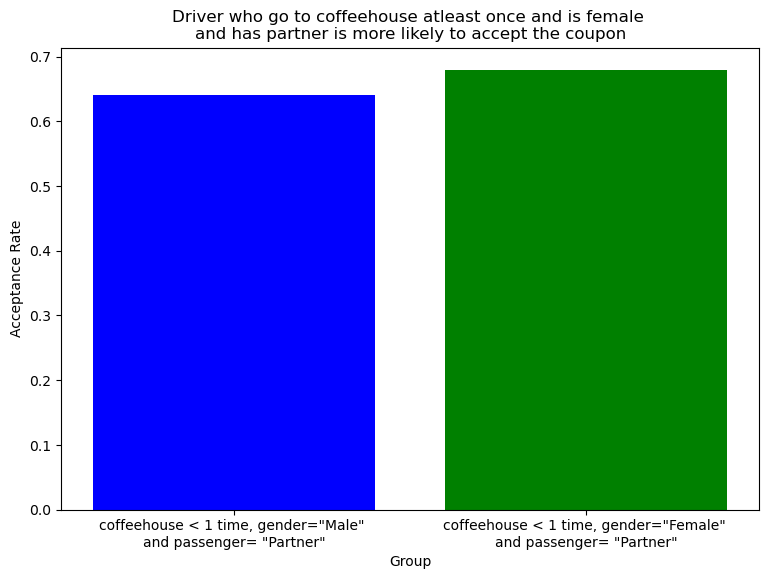

In [1188]:
# Data for plotting
groups = ['coffeehouse < 1 time, gender="Male" \nand passenger= "Partner"', 'coffeehouse < 1 time, gender="Female" \nand passenger= "Partner"']
acceptance_rates = [df12_acceptance_rate, df13_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who go to coffeehouse atleast once and is female \nand has partner is more likely to accept the coupon')

5. Compare the acceptance rate between those who went to coffeehouse atleast once and are female to the all others

In [1190]:
df14_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['gender'] == 'Female')]['Y'].mean().round(2)
df14_acceptance_rate

0.57

In [1191]:
df15_acceptance_rate = coffee_df[~(coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['gender'] == 'Female'))]['Y'].mean().round(2)
df15_acceptance_rate

0.45

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once and \nis female is more likely to accept the coupon than others')

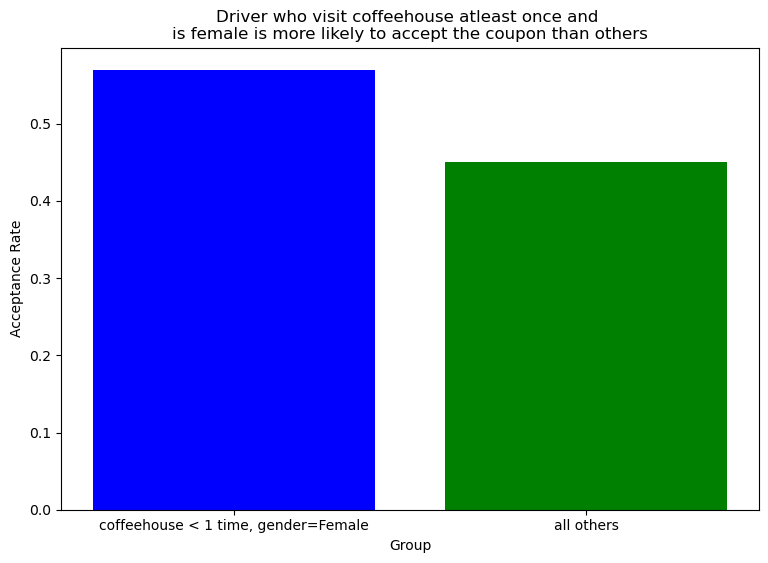

In [1192]:
# Data for plotting
groups = ['coffeehouse < 1 time, gender=Female', 'all others']
acceptance_rates = [df14_acceptance_rate, df15_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once and \nis female is more likely to accept the coupon than others')

6. Compare the acceptance rates between those drivers who:
go to coffeehouse atleast once and is travelling alone and is not going to any urgent place
go to coffeehouse atleast once and is travelling alone and is going to Home

In [1194]:
df16_acceptance_rate = coffee_df[(coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['passenger'] == 'Alone') & 
                            (coffee_df['destination'] =='No Urgent Place'))]['Y'].mean().round(2)
df16_acceptance_rate

0.69

In [1195]:
df17_acceptance_rate = coffee_df[(coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                            (coffee_df['passenger'] == 'Alone') & 
                            (coffee_df['destination'] =='Home'))]['Y'].mean().round(2)
df17_acceptance_rate

0.44

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once and is travelling alone \nwith no urgent places to go to is more likely to accept the coupon than others')

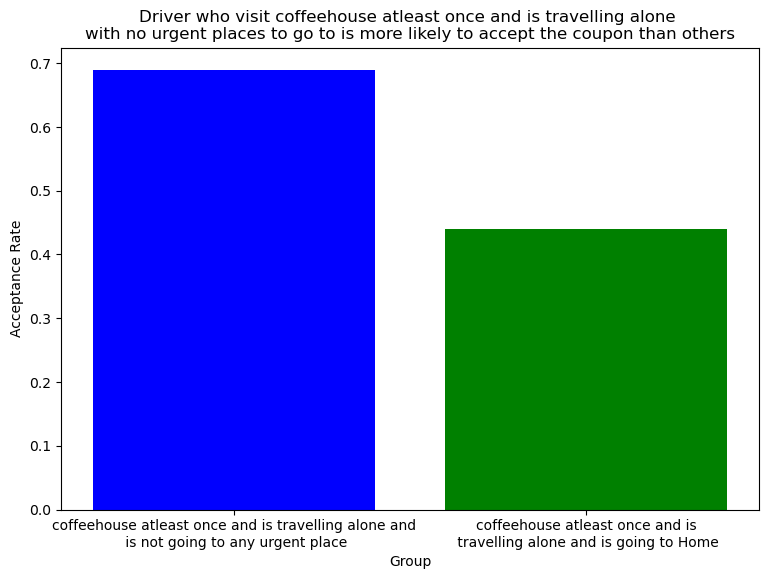

In [1196]:
# Data for plotting
groups = ['coffeehouse atleast once and is travelling alone and\n is not going to any urgent place', 'coffeehouse atleast once and is\n travelling alone and is going to Home']
acceptance_rates = [df16_acceptance_rate, df17_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once and is travelling alone \nwith no urgent places to go to is more likely to accept the coupon than others')

In [1197]:
# Observation:

7. Compare the acceptance rates between those drivers who:
go to coffeehouse atleast once, is married and travelling with partner and is going home
go to coffeehouse atleast once, is married and travelling alone and is going home

In [1199]:
df18_acceptance_rate = coffee_df[(coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['maritalStatus'] == 'Married partner') & (coffee_df['passenger'] == 'Partner') &
                                  (coffee_df['destination'] =='Home'))]['Y'].mean().round(2)
df18_acceptance_rate

0.71

In [1200]:
df19_acceptance_rate = coffee_df[(coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['maritalStatus'] == 'Married partner') & (coffee_df['passenger'] == 'Alone') &
                                  (coffee_df['destination'] =='Home'))]['Y'].mean().round(2)
df19_acceptance_rate

0.41

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once, married, travelling with partner \nand going home is more likely to accept the coupon')

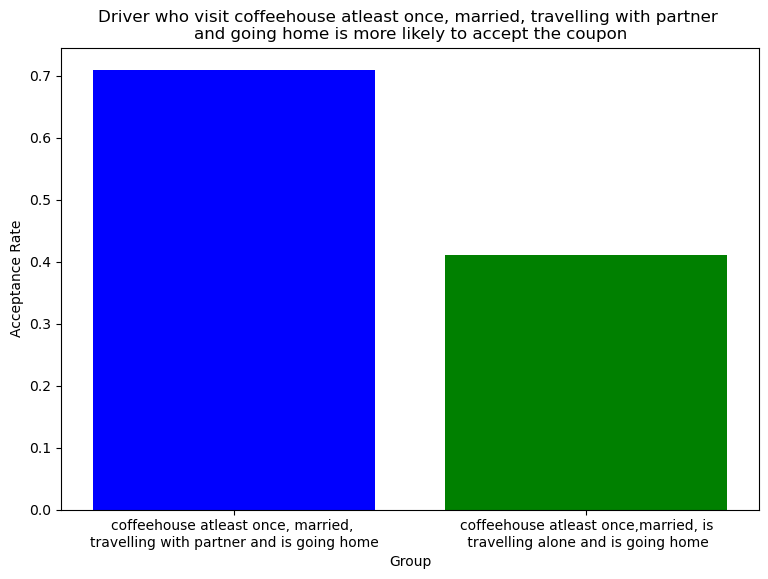

In [1201]:
# Data for plotting
groups = ['coffeehouse atleast once, married, \ntravelling with partner and is going home', 'coffeehouse atleast once,married, is\n travelling alone and is going home']
acceptance_rates = [df18_acceptance_rate, df19_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once, married, travelling with partner \nand going home is more likely to accept the coupon')

8. Compare the acceptance rates between drivers who go to coffeehouse atleast once, and has income more than 50k to all others

In [1203]:
income_less_than_50k = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

df20_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['income'].isin(income_less_than_50k))]['Y'].mean().round(2)
df20_acceptance_rate

0.61

In [1204]:
df21_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (~coffee_df['income'].isin(income_less_than_50k))]['Y'].mean().round(2)
df21_acceptance_rate

0.57

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once and \n has income less than 50k is more likely to accept the coupon')

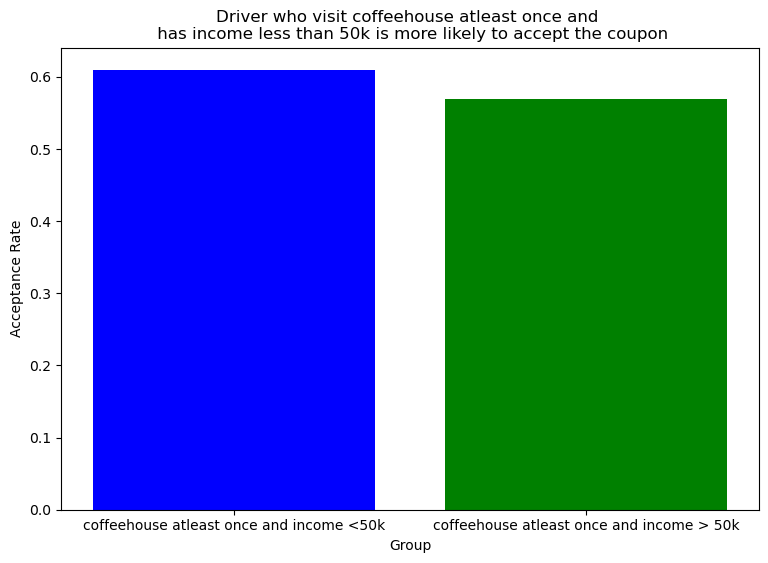

In [1205]:
# Data for plotting
groups = ['coffeehouse atleast once and income <50k', 'coffeehouse atleast once and income > 50k']
acceptance_rates = [df20_acceptance_rate, df21_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once and \n has income less than 50k is more likely to accept the coupon')

9. Compare the acceptance rates between drivers who go to coffeehouse atleast once, and has child to those who doesn't have a child.

In [1207]:
df22_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['has_children'] == 1)]['Y'].mean().round(2)
df22_acceptance_rate

0.58

In [1208]:
df23_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['has_children'] == 0)]['Y'].mean().round(2)
df23_acceptance_rate

0.6

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once and \nhas no children is more likely to accept the coupon')

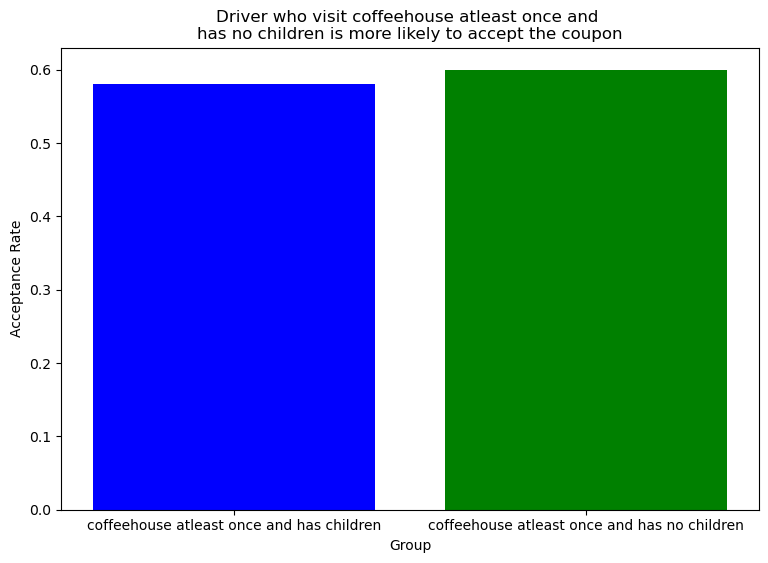

In [1209]:
# Data for plotting
groups = ['coffeehouse atleast once and has children', 'coffeehouse atleast once and has no children']
acceptance_rates = [df22_acceptance_rate, df23_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once and \nhas no children is more likely to accept the coupon')

10. Compare the acceptance rates between drivers who go to coffeehouse atleast once, and has occupation as student to all others

In [1211]:
df24_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['occupation'] == 'Student')]['Y'].mean().round(2)
df24_acceptance_rate

0.68

In [1212]:
df25_acceptance_rate = coffee_df[coffee_df['CoffeeHouse'].isin(coffee_atleast_once) &
                         (coffee_df['occupation'] != 'Student')]['Y'].mean().round(2)
df25_acceptance_rate

0.58

Text(0.5, 1.0, 'Driver who visit coffeehouse atleast once and\n is student is more likely to accept the coupon')

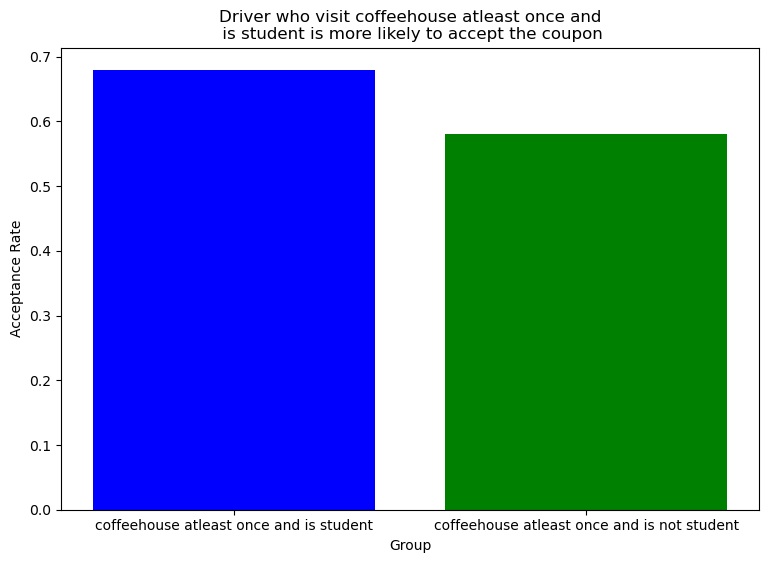

In [1213]:
# Data for plotting
groups = ['coffeehouse atleast once and is student', 'coffeehouse atleast once and is not student']
acceptance_rates = [df24_acceptance_rate, df25_acceptance_rate]

plt.figure(figsize=(9, 6))
plt.bar(groups, acceptance_rates, color=['blue', 'green'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.title('Driver who visit coffeehouse atleast once and\n is student is more likely to accept the coupon')

## Findings for Coffeehouse coupon data

In [ ]:
# Drivers who visit coffeehouse atleast once and are student or unemployed or has no children or income less than 50k or is married and 
# travelling with partner and is going home or travelling alone and going to non urgent places are more likely to accept the coupons